
# Link of the notebook: http://bit.ly/DR_Workshop


 # Dimensionality Reduction 


Reducing number of dimensions which means that the number of new features is lower than the number of original features.
First, we need to import numpy, matplotlib, and scikit-learn and get the UCI ML digit image data. Scikit-learn already comes with this data (or will automatically download it for you) so we don’t have to deal with uncompressing it ourselves! Additionally, I’ve provided a function that will produce a nice visualization of our data.

We are going to use the following libraries and packages:

* **numpy**: "NumPy is the fundamental package for scientific computing with Python." (http://www.numpy.org/)
* **matplotlib**: "Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms." (https://matplotlib.org/)
* **sklearn**: Scikit-learn is a machine learning library for Python programming language. (https://scikit-learn.org/stable/)
* **pandas**: "Pandas provides easy-to-use data structures and data analysis tools for Python." (https://pandas.pydata.org/)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox 
import pandas as pd


## Number of features (dimensions) and size of dataframes (files)

By increasing number of columns (features) in your dataframe, size of files that you have to store will increase. Hence, the running time of your programms will increase both when you want to write and read the files and when you want to implement any process on your dataframes.

In [0]:
df = pd.DataFrame(np.random.randn(1000, 10000))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 76.3 MB


## Principal Component Analysis (PCA)
Principal component analysis creates new orthogonal variables (principle components) that are linear combinations of the original variables. The focus of PCA is to reproduce the total variance in the original higher dimensional space in the lower dimensional space.
PCA is an optimum approach for mapping to the lower dimensional space and be able to reconstruct the original space afterward.

1) The first principal component (PC) corresponds to a line that passes through the mean. The lines is the regression line so that it minimizes the sum of squares of the distances of the points from the line. 

2) The second PC corresponds to the same concept after all correlation with the first principal component has been subtracted from the points.


## Synthetic data 

Let's generate synthetic data as follows:
1) Points are scattered in 2 dimensional space as follows. There are N-2 other dimensions that all the points have same values in each dimension
2) We will reduce the dimensionality of the data to 2D


Text(0, 0.5, '2nd dimension')

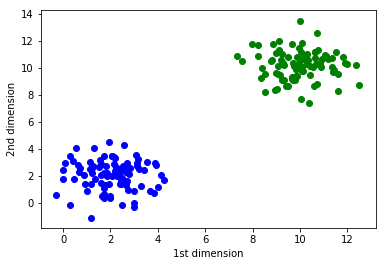

In [0]:
group_1_X = np.repeat(2,90)+np.random.normal(loc=0, scale=1,size=90)
group_1_Y = np.repeat(2,90)+np.random.normal(loc=0, scale=1,size=90)

group_2_X = np.repeat(10,90)+np.random.normal(loc=0, scale=1,size=90)
group_2_Y = np.repeat(10,90)+np.random.normal(loc=0, scale=1,size=90)

plt.scatter(group_1_X,group_1_Y, c='blue')
plt.scatter(group_2_X,group_2_Y,c='green')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')

### Implementing PCA on the synthetic data

(180, 2)


Text(0.5, 1.0, 'ICA')

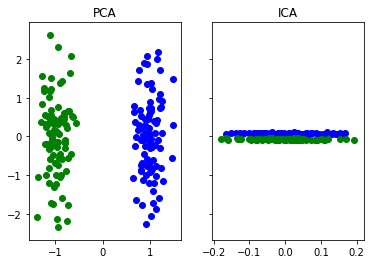

In [0]:
####
combined = pd.DataFrame(np.column_stack((np.concatenate([group_1_X,group_2_X]),np.concatenate([group_1_Y,group_2_Y]))))
print(combined.shape)
####
from sklearn import decomposition

combined_pca = decomposition.PCA(n_components=2,whiten=True).fit_transform(combined)
combined_ica = decomposition.FastICA(n_components=2, random_state=5).fit_transform(combined)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(combined_pca[0:90,0], combined_pca[0:90,1], c='blue')
ax1.scatter(combined_pca[90:180,0], combined_pca[90:180,1], c='green')
ax1.set_title('PCA')

ax2.scatter(combined_ica[0:90,0], combined_ica[0:90,1], c='blue')
ax2.scatter(combined_ica[90:180,0], combined_ica[90:180,1], c='green')
ax2.set_title('ICA')

### Variance explained by PCs
The variance explained by PCs decreases in order. In other word, the first PC explaines the most varaince and then the 2nd one and so on. The total variance explained by the PCs is supposed to be equal to the total varaince of the data.

In [0]:
component_num = 2
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(combined)

## Explained variance ratio by PCs
print(pca.explained_variance_ratio_)
## Singular values
print(pca.singular_values_)
## Get the coefficients of each original feature in building the PCs
print(pd.DataFrame(pca.components_,columns=combined.columns,index = ['PC1','PC2']))


#ica = decomposition.FastICA(n_components=component_num)
#ica.fit_transform(combined)
## Mixing matrix for ICA
# print(ica.mixing_)

[0.96658048 0.03341952]
[77.5488639  14.41970947]
            0         1
PC1 -0.699312 -0.714817
PC2  0.714817 -0.699312


### Let's change the structure of synthetic data

Let's generate synthetic data as follows:

Text(0, 0.5, '2nd dimension')

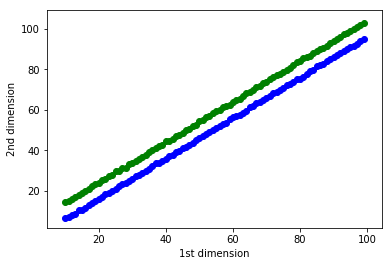

In [0]:
group_1_X = np.arange(10,100)
group_1_Y = np.arange(10,100)+np.random.normal(loc=0, scale=0.3,size=90)-np.repeat(4,90)

group_2_X = np.arange(10,100)
group_2_Y = np.arange(10,100)+np.random.normal(loc=0, scale=0.3,size=90)+np.repeat(4,90)

plt.scatter(group_1_X,group_1_Y, c='blue')
plt.scatter(group_2_X,group_2_Y,c='green')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')

### Implementing PCA on the synthetic data




(180, 2)


Text(0.5, 1.0, 'ICA')

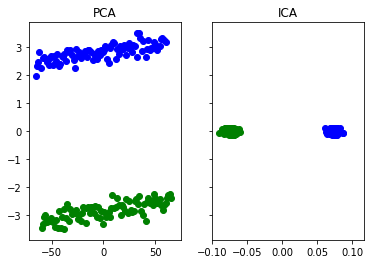

In [0]:
####
combined = pd.DataFrame(np.column_stack((np.concatenate([group_1_X,group_2_X]),np.concatenate([group_1_Y,group_2_Y]))))
print(combined.shape)
####
combined_pca = decomposition.PCA(n_components=2).fit_transform(combined)
combined_ica = decomposition.FastICA(n_components=2, random_state=5).fit_transform(combined)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(combined_pca[0:90,0], combined_pca[0:90,1], c='blue')
ax1.scatter(combined_pca[90:180,0], combined_pca[90:180,1], c='green')
ax1.set_title('PCA')

ax2.scatter(combined_ica[0:90,0], combined_ica[0:90,1], c='blue')
ax2.scatter(combined_ica[90:180,0], combined_ica[90:180,1], c='green')
ax2.set_title('ICA')

### Checking the varaince explained by each component




In [0]:
component_num = 2
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(combined)

## Explained variance ratio by PCs
print(pca.explained_variance_ratio_)
## Singular values
print(pca.singular_values_)
## Get the coefficients of each original feature in building the PCs
print(pd.DataFrame(pca.components_,columns=combined.columns,index = ['PC1','PC2']))


#ica = decomposition.FastICA(n_components=component_num)
#ica.fit_transform(combined)
## Mixing matrix for ICA
# print(ica.mixing_)

[0.99409738 0.00590262]
[494.36430284  38.09386859]
            0         1
PC1  0.702907  0.711282
PC2  0.711282 -0.702907


### Another synthetic data

Let's generate synthetic data as follows:


(0, 2.5)

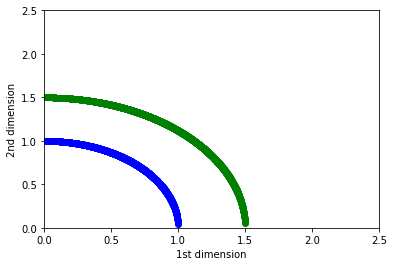

In [0]:
group_1_X = np.arange(start=0,stop=1**2,step=0.001)
group_1_Y = np.sqrt(np.repeat(1**2,1000)-group_1_X**2)

group_2_X = np.arange(start=0,stop=1.5,step=0.001)
group_2_Y = np.sqrt(np.repeat(1.5**2,1500)-group_2_X**2)

plt.scatter(group_1_X,group_1_Y, c='blue', )
plt.scatter(group_2_X,group_2_Y,c='green')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')
plt.xlim(0,2.5)
plt.ylim(0,2.5)

### Implementing PCA on the synthetic data

(2500, 2)


Text(0.5, 1.0, 'ICA')

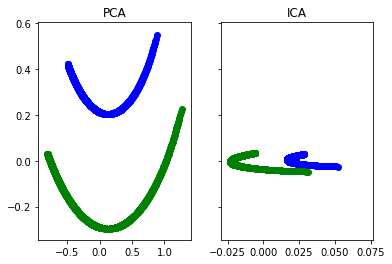

In [0]:
combined = pd.DataFrame(np.column_stack((np.concatenate([group_1_X,group_2_X]),np.concatenate([group_1_Y,group_2_Y]))))
print(combined.shape)
####
combined_pca = decomposition.PCA(n_components=2).fit_transform(combined)
combined_ica = decomposition.FastICA(n_components=2, random_state=5).fit_transform(combined)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(combined_pca[0:1000,0], combined_pca[0:1000,1], c='blue')
ax1.scatter(combined_pca[1000:2500,0], combined_pca[1000:2500,1], c='green')
ax1.set_title('PCA')

ax2.scatter(combined_ica[0:1000,0], combined_ica[0:1000,1], c='blue')
ax2.scatter(combined_ica[1000:2500,0], combined_ica[1000:2500,1], c='green')
ax2.set_title('ICA')

### Checking the varaince explained by each component


In [0]:
component_num = 2
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(combined)

## Explained variance ratio by PCs
print(pca.explained_variance_ratio_)
## Singular values
print(pca.singular_values_)
## Get the coefficients of each original feature in building the PCs
print(pd.DataFrame(pca.components_,columns=combined.columns,index = ['PC1','PC2']))


ica = decomposition.FastICA(n_components=component_num)
ica.fit_transform(combined)
## Mixing matrix for ICA
print(ica.mixing_)

[0.78894956 0.21105044]
[23.6954123  12.25554917]
            0         1
PC1  0.782592 -0.622535
PC2 -0.622535 -0.782592
[[ -2.95179551  19.83355813]
 [-12.85361731 -12.01550858]]


### Conclusion:
* Higher percentage of explanied variance does not make a dimension a better choice for separating the groups of data points.
* Getting rid of PCs with low explained variance may not be always a good idea.
* If there are groups of data points, we may not be able to separate them by PCA. Main issue is nonlinearity in data structure in high dimensinal space.

## UCI ML digit image data

* load and return digit data set

In [0]:
from sklearn import datasets

# Loading digit images
digits = datasets.load_digits()

X = pd.DataFrame(digits.data)
y = digits.target
n_samples, n_features = X.shape
print("number of samples (data points):", n_samples)
print("number of features:", n_features)

number of samples (data points): 1797
number of features: 64


Pixels of images have values between 0 and 16.
Chacking varaince of each feature across samples is informative.

In [0]:
## Maximum of the whole dataframe
#X.max().max()

## Maximum of each column of the dataframe
#X.max()

##
X.var()

0      0.000000
1      0.822997
2     22.608374
3     18.052657
4     18.381696
5     32.108290
6     11.060781
7      1.076163
8      0.008878
9     10.215441
10    29.392181
11    15.820845
12    22.874033
13    36.638325
14    12.861698
15     0.685443
16     0.003890
17    12.789931
18    32.384828
19    33.670883
20    38.139623
21    38.406797
22    10.626750
23     0.192368
24     0.001112
25     9.900667
26    38.341332
27    34.608942
28    37.848246
29    34.486909
        ...    
34    40.001670
35    39.292728
36    35.206306
37    34.464503
38    12.512369
39     0.000000
40     0.021079
41     8.891228
42    42.744851
43    41.491345
44    39.181483
45    32.439023
46    18.757139
47     0.094468
48     0.041707
49     3.049050
50    31.860336
51    27.320982
52    28.111718
53    36.374824
54    24.200556
55     0.969045
56     0.000556
57     0.872920
58    26.040807
59    19.137948
60    24.343836
61    34.817348
62    16.732582
63     3.460053
Length: 64, dtype: float

Let's write a function to use it for visualization of the results of all the dimension reduction methods.

#### Let's visualize some of the images

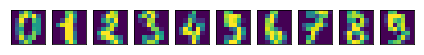

In [0]:
fig, ax_array = plt.subplots(1,10)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i])
plt.setp(axes, xticks=[], yticks=[])
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Now that we understood how PCa works, let's implement it on the UCI ML digit image data:

In [0]:
from sklearn import decomposition

X_pca = decomposition.PCA(n_components=2).fit_transform(X)
X_pca.shape

(1797, 2)

Now, we use the plotting function to show the first 2 principle component scores of all teh data points.

In [0]:
def embedding_plot(X,labels,title):
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', s=5)
  plt.gca().set_facecolor((1, 1, 1))
  plt.xlabel('1st dimension')
  plt.ylabel('2nd dimension')
  plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
  plt.grid(False)
  plt.title(title, fontsize=24);

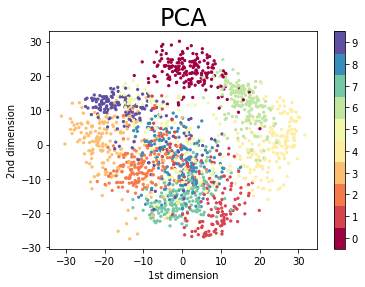

In [0]:
embedding_plot(X_pca, y,"PCA")

**PCA is an unsupervised approach. We add color for the sample labels afterward.**

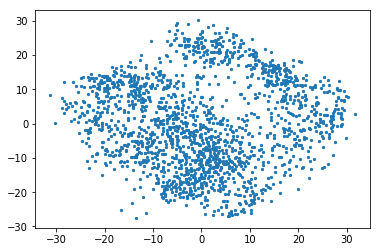

In [0]:
plt.scatter(X_pca[:,0], X_pca[:,1], s=5)
plt.gca().set_facecolor((1, 1, 1))

Let's check the variance explained by PCs for the UCI ML image data:

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415]


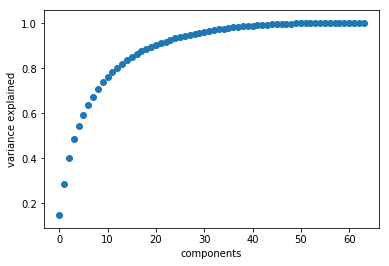

In [0]:
component_num = X.shape[1]
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(X)

plt.scatter(range(0,component_num),np.cumsum(pca.explained_variance_ratio_))
plt.gca().set_facecolor((1, 1, 1))
plt.xlabel('components')
plt.ylabel('variance explained')
print(pca.explained_variance_ratio_[0:5])

In [0]:
## Singular values
print(pca.singular_values_)
## Get the coefficients of each original feature in building the PCs
print(pd.DataFrame(pca.components_).iloc[0:4,0:5])

[5.67006567e+02 5.42251854e+02 5.04630594e+02 4.26117676e+02
 3.53335033e+02 3.25820366e+02 3.05261580e+02 2.81160331e+02
 2.69069782e+02 2.57823951e+02 2.26318797e+02 2.21514832e+02
 1.98330715e+02 1.95700139e+02 1.77976271e+02 1.74460791e+02
 1.68727876e+02 1.64158492e+02 1.48233309e+02 1.39831325e+02
 1.38584433e+02 1.31188207e+02 1.28726917e+02 1.24931590e+02
 1.22575034e+02 1.13444877e+02 1.11480271e+02 1.05463488e+02
 1.02807802e+02 9.62285662e+01 8.98129647e+01 8.73349465e+01
 8.52596044e+01 8.41567134e+01 8.15893653e+01 7.96420046e+01
 7.44304714e+01 7.01219569e+01 6.92755923e+01 6.75640682e+01
 6.40331590e+01 5.85269779e+01 5.71281856e+01 5.50924318e+01
 5.01790999e+01 4.81749428e+01 4.56228649e+01 4.08958572e+01
 3.46850352e+01 2.95461187e+01 2.12889966e+01 1.33446026e+01
 1.06481402e+01 1.04443771e+01 8.44041164e+00 5.18181553e+00
 3.90097916e+00 2.55109635e+00 1.51445826e+00 1.08979014e+00
 8.60437712e-01 4.53055082e-14 4.53055082e-14 4.49584828e-14]
              0        

## Normalizing data before dimensionality reduction

It is a good idea usually to normalize the data so that the scale of values for different features would become similar. 

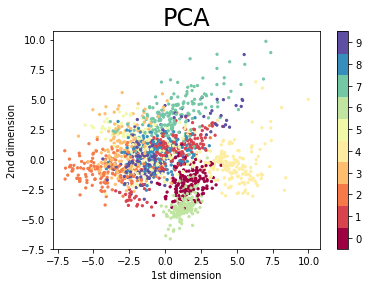

In [0]:
from sklearn import preprocessing
X_norm = pd.DataFrame(preprocessing.scale(X)) 

Xnorm_pca = decomposition.PCA(n_components=2).fit_transform(X_norm)
Xnorm_pca.shape

embedding_plot(Xnorm_pca, y,"PCA")

In [0]:
X_norm.shape

(1797, 64)

## Independent Component Analysis (ICA)


Note.  If two variables are independent, they are uncorreltaed but the reverse is not true.

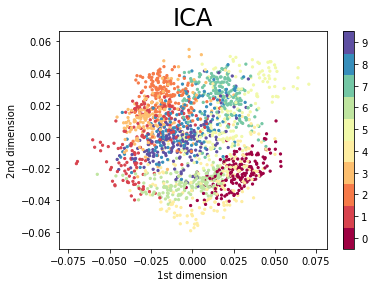

In [0]:
X_ica = decomposition.FastICA(n_components=4, random_state=5).fit_transform(X)
#X_ica.shape

embedding_plot(X_ica, y,"ICA")

## Normalization and whitening of data beforfe implementing ICA

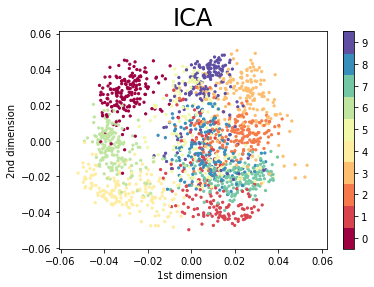

In [0]:
from sklearn import preprocessing
X_norm = pd.DataFrame(preprocessing.scale(X))

Xnorm_pca = decomposition.PCA(n_components=X_norm.shape[1]).fit_transform(X_norm)

X_ica = decomposition.FastICA(n_components=2, random_state=5).fit_transform(X_pca)
X_ica.shape

embedding_plot(X_ica, y,"ICA")

## Working with another dataset: 

In [0]:
from sklearn import datasets

# Loading digit images
housing = datasets.california_housing.fetch_california_housing()

Xhouse = pd.DataFrame(housing.data)
Xhouse.columns = housing.feature_names

yhouse = housing.target
n_samples, n_features = Xhouse.shape

print("number of samples (data points):", n_samples)
print("number of features:", n_features)

number of samples (data points): 20640
number of features: 8


"This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people)."

Reference:
Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297

# Features:


1.   average income: median income in block
2.   housing average age: median house age in block
3.   average rooms: average number of rooms
4.   average bedrooms: average number of bedrooms
5.   population: block population
6.   average occupation: average house occupancy
7.   latitude: house block latitude
8.   longitude: house block longitude

In [0]:
Xhouse.iloc[0:5,:]

MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25

[5 rows x 8 columns]

**The target variable is ordinal (continuous).**

In [0]:
np.var(yhouse)

1.3315503000818076

## Normalization
Scale of values in columsn are different from each other:

In [0]:
Xhouse.var()

MedInc        3.609323e+00
HouseAge      1.583963e+02
AveRooms      6.121533e+00
AveBedrms     2.245915e-01
Population    1.282470e+06
AveOccup      1.078700e+02
Latitude      4.562293e+00
Longitude     4.014139e+00
dtype: float64

Hence, we normalize the data as follows:

In [0]:
from sklearn import preprocessing
Xhouse_norm = pd.DataFrame(preprocessing.scale(Xhouse), columns=Xhouse.columns) 

In [0]:
print(Xhouse_norm.mean())
print(Xhouse_norm.var())

MedInc        3.734255e-16
HouseAge      8.557001e-16
AveRooms      2.704111e-16
AveBedrms    -1.531384e-16
Population   -6.465442e-17
AveOccup      6.064808e-19
Latitude      1.256263e-15
Longitude    -6.527810e-15
dtype: float64
MedInc        1.000048
HouseAge      1.000048
AveRooms      1.000048
AveBedrms     1.000048
Population    1.000048
AveOccup      1.000048
Latitude      1.000048
Longitude     1.000048
dtype: float64


## Implementing PCA on california housing dataset

In [0]:
Xhousenorm_pca = decomposition.PCA(n_components=2).fit_transform(Xhouse_norm)
Xhousenorm_pca.shape

(20640, 2)

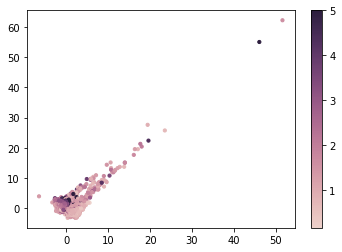

In [0]:
import seaborn as sns

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots()
points = ax.scatter(x=Xhousenorm_pca[:,0], y=Xhousenorm_pca[:,1], c=yhouse, s=10, cmap=cmap)
fig.colorbar(points)

Let's check the variance explained by PCs for the UCI ML image data:

[0.25336868 0.23516245 0.15888635 0.12887971 0.12538195 0.0824225
 0.01020022 0.00569814]


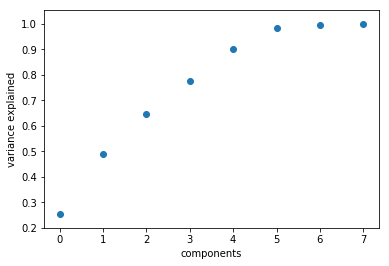

In [0]:
component_num = Xhouse_norm.shape[1]
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(Xhouse_norm)

plt.scatter(range(0,component_num),np.cumsum(pca.explained_variance_ratio_))
plt.gca().set_facecolor((1, 1, 1))
plt.xlabel('components')
plt.ylabel('variance explained')
print(pca.explained_variance_ratio_[:])

It is good to check the coefficient of each one of the original features in building the new dimensions.


In [0]:
pca = decomposition.PCA(n_components=Xhouse_norm.shape[1])
pca.fit_transform(Xhouse_norm)

print(pd.DataFrame(pca.components_,columns=Xhouse.columns.values).iloc[:,:])

     MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  0.077462  0.007318  0.439142  ... -0.014644  0.568364  -0.536974
1  0.229879 -0.260786  0.546687  ...  0.002621 -0.374011   0.422387
2  0.218222 -0.627551 -0.063999  ...  0.157727  0.192600  -0.180824
3 -0.885294 -0.109898 -0.046402  ...  0.004918  0.062214   0.059846
4 -0.002603  0.222936  0.029852  ...  0.972669 -0.022761   0.011807
5  0.149818  0.683931  0.095054  ... -0.169410 -0.042069  -0.082551
6  0.169238 -0.081035 -0.530662  ...  0.003246 -0.431797  -0.461698
7 -0.242271 -0.044846  0.458814  ...  0.008959 -0.554415  -0.526165

[8 rows x 8 columns]


Let's check correlation of original features:

In [0]:
Xhouse.corr()

MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
MedInc      1.000000 -0.119034  0.326895  ...  0.018766 -0.079809  -0.015176
HouseAge   -0.119034  1.000000 -0.153277  ...  0.013191  0.011173  -0.108197
AveRooms    0.326895 -0.153277  1.000000  ... -0.004852  0.106389  -0.027540
AveBedrms  -0.062040 -0.077747  0.847621  ... -0.006181  0.069721   0.013344
Population  0.004834 -0.296244 -0.072213  ...  0.069863 -0.108785   0.099773
AveOccup    0.018766  0.013191 -0.004852  ...  1.000000  0.002366   0.002476
Latitude   -0.079809  0.011173  0.106389  ...  0.002366  1.000000  -0.924664
Longitude  -0.015176 -0.108197 -0.027540  ...  0.002476 -0.924664   1.000000

[8 rows x 8 columns]

We can also check distribution of each feature to check for symmetry and possible outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21b68ffe48>,
      dtype=object)

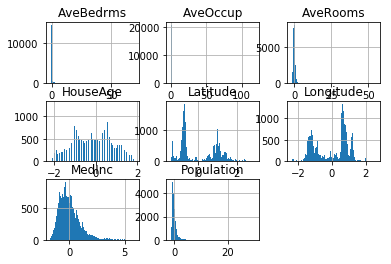

In [0]:
Xhouse_norm.hist(bins=100)

In [0]:
## Outlier threshold is defined as mean(+-)a*std where 1 could be a number between 1.5 and 3
print("Upper threshold:", Xhouse_norm.loc[:,"Population"].mean()+3*Xhouse_norm.loc[:,"Population"].std())
print("Upper threshold:", Xhouse_norm.loc[:,"Population"].mean()-3*Xhouse_norm.loc[:,"Population"].std())

Upper threshold: 3.000072677059492
Upper threshold: -3.000072677059492


Now, let's remove the data points with extreme values (outliers) and implement PCA on the new dataframe.

Size of the new dataframe: (19794, 8)
Size of the original dataframe: (20640, 8)


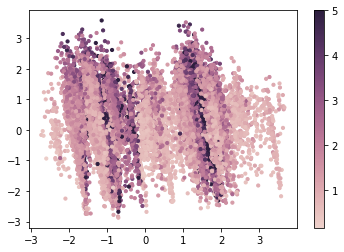

In [0]:
#Xhouse_norm_noout = Xhouse_norm[Xhouse_norm.Population < 3]

Xhouse_norm_noout = Xhouse_norm.iloc[np.where((Xhouse_norm.max(axis=1) < 3)==True)[0],:]

print("Size of the new dataframe:",Xhouse_norm_noout.shape)
print("Size of the original dataframe:",Xhouse_norm.shape)

## We can implement PCA on the new data without outliers of Population feature
pca_popout = decomposition.PCA(n_components=Xhouse_norm.shape[1]).fit_transform(Xhouse_norm_noout)

fig, ax = plt.subplots()
points = ax.scatter(x=pca_popout[:,0], y=pca_popout[:,1], c=yhouse[np.where((Xhouse_norm.max(axis=1) < 3)==True)[0]], s=10, cmap=cmap)
fig.colorbar(points)

We can also check the varaince explained by new PCs:

[0.42981727 0.2465962  0.17072921 0.09574977 0.03569867 0.01268581
 0.0072607  0.00146237]


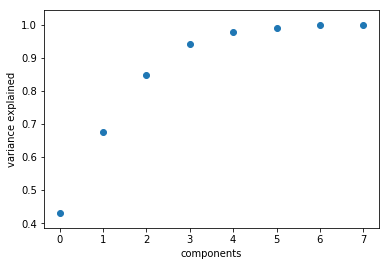

In [0]:
component_num = Xhouse_norm_noout.shape[1]
pca_popout = decomposition.PCA(n_components=component_num)
pca_popout.fit_transform(Xhouse_norm_noout)

plt.scatter(range(0,component_num),np.cumsum(pca_popout.explained_variance_ratio_))
plt.gca().set_facecolor((1, 1, 1))
plt.xlabel('components')
plt.ylabel('variance explained')
print(pca_popout.explained_variance_ratio_[:])

Explained varaince ratio by the 1st component increased comparing to the original data. Hence, outliers can heavily affect the results of PCA, and some other dimensionality reduction methods.

## Implementing ICA on the California housing dataset

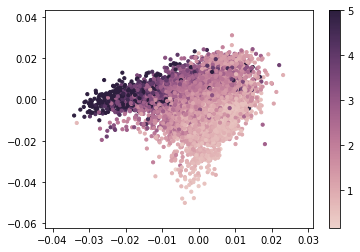

In [0]:
Xhousenorm_ica = decomposition.FastICA(n_components=Xhouse_norm_noout.shape[1], random_state=5).fit_transform(Xhouse_norm_noout)
Xhousenorm_ica.shape


fig, ax = plt.subplots()
points = ax.scatter(x=Xhousenorm_ica[:,0], y=Xhousenorm_ica[:,1], c=yhouse[np.where((Xhouse_norm.max(axis=1) < 3)==True)[0]], s=10, cmap=cmap)
fig.colorbar(points)

In [0]:
ica_noout = decomposition.FastICA(n_components=component_num)
ica_noout.fit_transform(Xhouse_norm_noout)
## Mixing matrix for ICA
print(pd.DataFrame(ica_noout.mixing_, columns=Xhouse_norm_noout.columns.values))

      MedInc   HouseAge   AveRooms  ...    AveOccup    Latitude  Longitude
0 -25.213103   0.972990  -9.013819  ... -108.722850  -30.846165 -22.835347
1 -10.414021  15.767978 -11.541071  ...  -12.499471  136.512715  -2.067559
2 -47.328122   1.992159  30.525611  ...  -32.018557  -21.031211  -2.037305
3   4.606667  -1.720522  39.683650  ...    3.513939   -0.945445   1.440877
4   3.085840 -97.412945 -10.093858  ...    4.300238  -18.178194  -5.974865
5  -3.069547  -0.926615  -0.888771  ...    0.846087    0.093684  -0.460438
6  -0.267309   1.864574   6.396312  ...    2.385086   -6.123242  45.431953
7  -9.820460  -1.186806   3.510234  ...    7.099594   -5.176351   3.584747

[8 rows x 8 columns]
